In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from numpy.linalg import inv
from numpy import transpose

In [2]:
# GENERATE DATA
# y = 0.5x + -0.3 + noise(with std = 0.2)

N = 51
X = np.linspace(-1, 1, N)
nstd = 0.2
noise = np.random.normal(0, nstd, N)
Y = 0.5 * X - 0.3 + noise

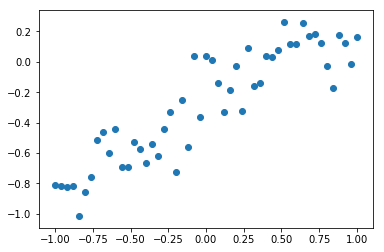

In [3]:
plt.scatter(X, Y)
plt.show()

In [4]:
# Train - Test Split

X, Y = shuffle(X, Y, random_state=42)
train_X, train_Y = X[:int(0.7 * N)], Y[:int(0.7 * N)]
test_X, test_Y = X[int(0.7 * N):], Y[int(0.7 * N):]

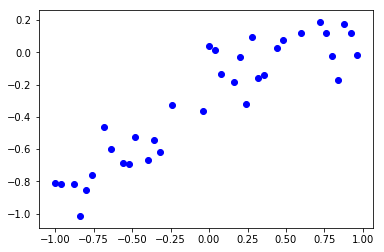

In [5]:
plt.scatter(train_X, train_Y, color='blue')
plt.show()

Iteration 1


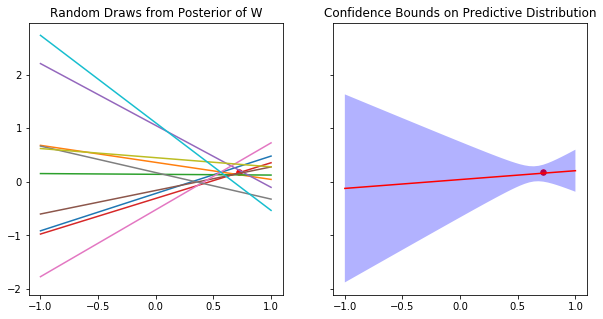

Iteration 2


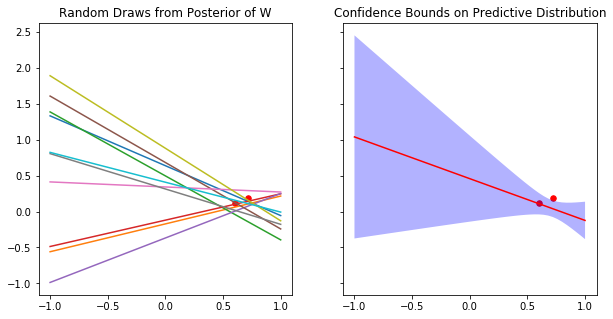

Iteration 3


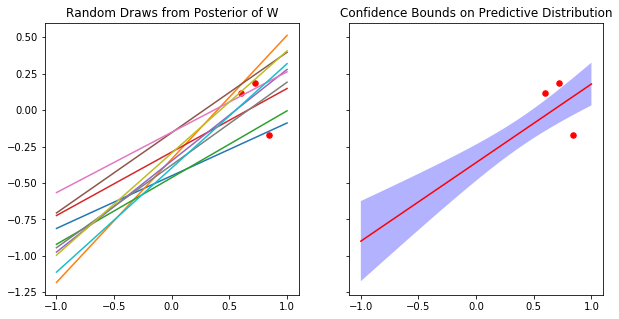

Iteration 4


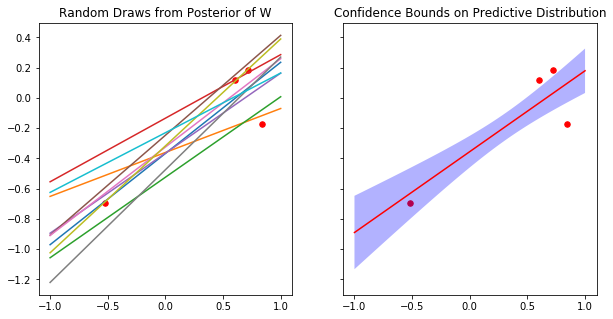

Iteration 5


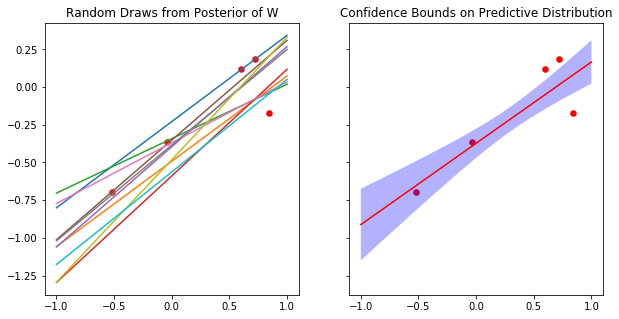

Iteration 10


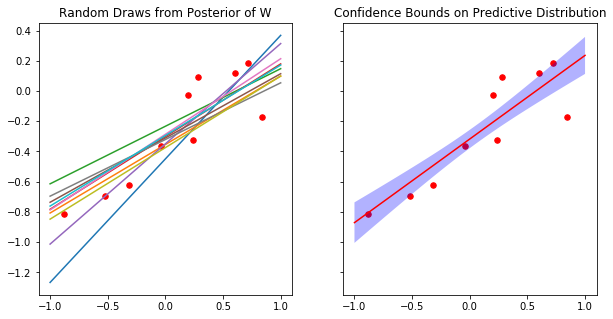

Iteration 15


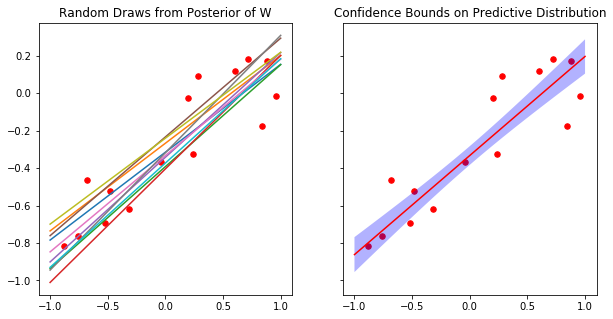

Iteration 20


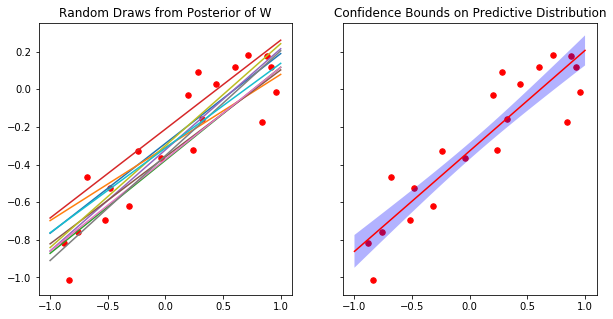

Iteration 25


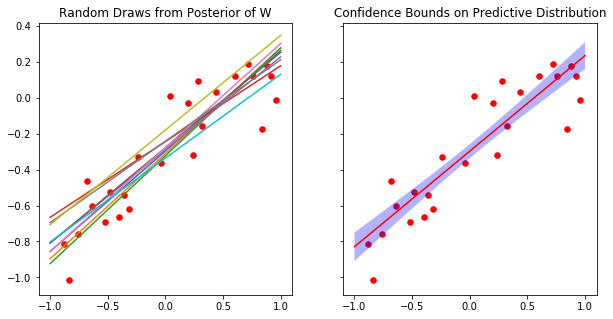

Iteration 30


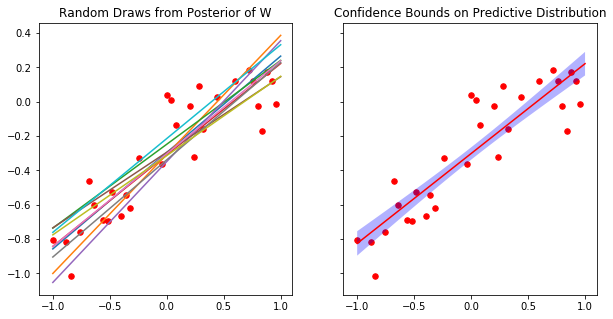

Iteration 34


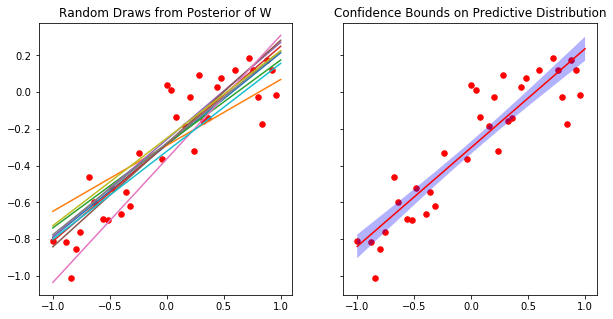

In [6]:
# Priors
alpha = 2.0 #uniform prior
beta = 1/(nstd * nstd) # noise precision
prior_mean = np.array([0, 0]).reshape(2, 1)
prior_variance = np.array([[alpha, 0] , [0, alpha]])

# augment training data with ones - for bias
train_X = train_X.reshape((train_X.shape[0], 1))
ones = np.ones(train_X.shape)
train_Xa = np.hstack((train_X, ones))


demo_X = np.linspace(-1, 1, N).reshape(51, 1)
demo_ones = np.ones(demo_X.shape)
demo_X = np.hstack((demo_X, demo_ones))

# x = [x, 1] 1 is augmented value for bias
for i in range(train_Xa.shape[0]):
    
    prior_precision = inv(prior_variance)
    x = train_Xa[i].reshape(1, 2)
    y = train_Y[i].reshape(1,1)
    
    # m1 = (S0^(-1) + beta*XT*X)^(-1) * (beta * XT * y + S0^(-1) * m0)
    xTx = np.dot(x.T, x)
    A = inv(prior_precision + beta*xTx)
    B = beta * np.dot(x.T, y) + np.dot(prior_precision,prior_mean)
    posterior_mean = np.dot(A, B)
    
    posterior_precision = prior_precision + beta * xTx
    posterior_cov = inv(posterior_precision)

    # plot
    if (i > 0 and i <= 5) or (i>0 and i % 5 == 0) or i == 34:
        # draw samples of weight vectors from the posterior distribution
        W = np.random.multivariate_normal(posterior_mean.flatten(), posterior_cov, 10)
        plx = np.linspace(-1, 1, N)
        print "Iteration", i
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,5))
        if i > 0:
            ax1.scatter(train_Xa[:i, 0], train_Y[:i], color='red' , marker='o', s=30)
        for w in W:
            line_y = w[0] * plx + w[1]
            ax1.plot(plx, line_y)
    
        ax1.set_title('Random Draws from Posterior of W')
        ax2.scatter(train_Xa[:i, 0], train_Y[:i], color='red', marker='o', s=30)

        posterior_predictive_mean = np.dot(demo_X, posterior_mean)
        predcov = lambda x: np.dot(x, np.dot(posterior_cov, x.T))
        posterior_predictive_cov = map(predcov, demo_X)
        UCL = posterior_predictive_mean[:,0] + np.sqrt(posterior_predictive_cov)
        LCL = posterior_predictive_mean[:,0] - np.sqrt(posterior_predictive_cov)
        ax2.plot(plx, posterior_predictive_mean, color='red')
        ax2.fill_between(plx, LCL, UCL, facecolor='blue', alpha=0.3)
        ax2.set_title('Confidence Bounds on Predictive Distribution')
        plt.show()
    
    # update priors
    prior_mean = posterior_mean
    prior_variance = posterior_cov

In [7]:
W

array([[ 0.50183002, -0.28757792],
       [ 0.35872787, -0.28984159],
       [ 0.45689224, -0.28188645],
       [ 0.53087317, -0.28113654],
       [ 0.52872719, -0.25773804],
       [ 0.56196406, -0.27974511],
       [ 0.67254331, -0.36326221],
       [ 0.49929722, -0.27679508],
       [ 0.47634886, -0.25055778],
       [ 0.47857106, -0.32168425]])